In [53]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import math

In [2]:
preprocessedDF = pd.read_csv('Dataset/preprocessed.csv')

# genres, adult, original language, production companies,production countries,realease year,runtime, cast, numfaces(???)

In [3]:
preprocessedDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37210 entries, 0 to 37209
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  37210 non-null  bool   
 1   belongs_to_collection  3918 non-null   object 
 2   budget                 37210 non-null  int64  
 3   genres                 37210 non-null  object 
 4   homepage               6307 non-null   object 
 5   id                     37210 non-null  int64  
 6   imdb_id                37210 non-null  int64  
 7   original_language      37205 non-null  object 
 8   original_title         37210 non-null  object 
 9   overview               36573 non-null  object 
 10  popularity             37210 non-null  float64
 11  poster_path            37210 non-null  object 
 12  production_companies   37210 non-null  object 
 13  production_countries   37210 non-null  object 
 14  release_date           37189 non-null  object 
 15  re

In [4]:
preprocessedDF.describe()

,budget,id,imdb_id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,...,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
count,3.721000e+04,37210.000000,3.721000e+04,37210.000000,3.721000e+04,37062.000000,37210.000000,37210.000000,37193.000000,37210.000000,...,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000,37210.000000
mean,4.711716e+06,92095.604327,8.350883e+05,3.114066,1.252765e+07,96.065242,5.717186,123.099973,6.409185,0.563612,...,54.121472,72.888216,66.108829,44.692045,102.676043,69.147140,112.402166,72.107912,127.214442,75.265465
std,1.820269e+07,97166.149197,1.144543e+06,5.596429,6.719505e+07,37.338853,1.796600,518.225290,1.142621,0.922337,...,28.890712,15.745163,19.977247,16.171165,49.732066,18.623296,48.762495,16.121290,51.192335,15.793882
min,0.000000e+00,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.200000,0.000000,...,0.000000,1.183370,0.000000,0.000000,0.882752,1.977672,0.726561,1.651825,1.337270,1.244778
25%,0.000000e+00,22969.250000,8.093450e+04,0.453325,0.000000e+00,86.000000,5.100000,4.000000,5.800000,0.000000,...,30.549816,62.818346,53.854725,34.489826,63.103481,56.652542,73.914467,61.786961,87.503894,65.441396
50%,0.000000e+00,51789.000000,2.363165e+05,1.290035,0.000000e+00,95.000000,6.000000,11.000000,6.600000,0.000000,...,50.157406,73.247646,66.716290,45.677917,98.034244,69.919507,110.593031,72.334171,127.259378,75.881237
75%,0.000000e+00,125163.250000,1.327770e+06,4.358514,0.000000e+00,108.000000,6.800000,42.000000,7.200000,1.000000,...,74.505922,83.473024,79.505317,55.664458,139.488232,82.423853,149.611802,82.938145,167.770281,86.003713
max,3.800000e+08,469172.000000,6.098922e+06,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,9.500000,16.000000,...,174.309900,125.836770,125.016174,88.502696,253.928587,125.838671,251.624791,125.841819,253.605869,125.837170


In [5]:
all_data = preprocessedDF

In [6]:
all_data.shape

(37210, 46)

In [7]:
all_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367


Formatting Production House Names

In [8]:
def convert_to_production_name(Col):
    Production_House_name=[]
    for entry in Col:
        split_str=entry.split(",")[0]
        start_index=split_str.find("'name'")+9
        prod_house=split_str[start_index:len(split_str)-1]
        if prod_house=='':
            prod_house=np.nan
        Production_House_name.append(prod_house)
    return Production_House_name
        

In [9]:
all_data['production_companies']=convert_to_production_name(all_data['production_companies'])

Formatting Country Names

In [10]:
def get_iso_name_of_countries(Col):
    Country_Name_Code=[]
    for entry in Col:
        split_str=entry.split(",")[0]
        start_index=split_str.find("'iso_3166_1'")+14
        cc_code=split_str[start_index:len(split_str)]
        Country_Name_Code.append(cc_code)
    return Country_Name_Code
  

In [11]:
all_data['production_countries']=get_iso_name_of_countries(all_data['production_countries'])    

Adult rated movies distribution

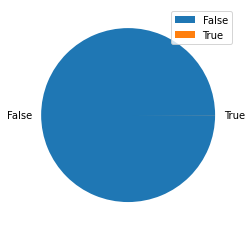

In [12]:
#Counts of Adult rated Movies
Lang_count=np.array(all_data['adult'].value_counts())
lab=all_data['adult'].value_counts().index
patches,text=plt.pie(Lang_count,labels=lab)
plt.legend(patches, lab, loc="best")
plt.show()


In [13]:
all_data['adult'].value_counts()

False    37204
True         6
Name: adult, dtype: int64

In [14]:
pd.DatetimeIndex(all_data['release_date']).year

Float64Index([1995.0, 1995.0, 1995.0, 1995.0, 1995.0, 1995.0, 1995.0, 1995.0,
              1995.0, 1995.0,
              ...
              1985.0, 1981.0, 1980.0, 1981.0, 2006.0, 1979.0, 1973.0, 2001.0,
                 nan, 1992.0],
             dtype='float64', name='release_date', length=37210)

In [15]:
# make group for each year and count the number of movies in each year 
year_data=all_data.groupby(pd.DatetimeIndex(all_data['release_date']).year).count()['id']
print(year_data)



release_date
1874.0       1
1878.0       1
1887.0       1
1888.0       2
1890.0       4
          ... 
2015.0    1400
2016.0     682
2017.0      10
2018.0       3
2020.0       1
Name: id, Length: 133, dtype: int64


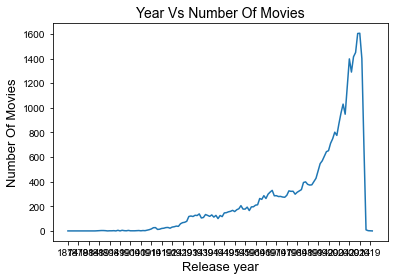

In [16]:
#make group of the data according to their release year and count the total number of movies in each year and pot.
all_data.groupby(pd.DatetimeIndex(all_data['release_date']).year).count()['id'].plot(xticks = np.arange(1874,2020,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(20,20)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")


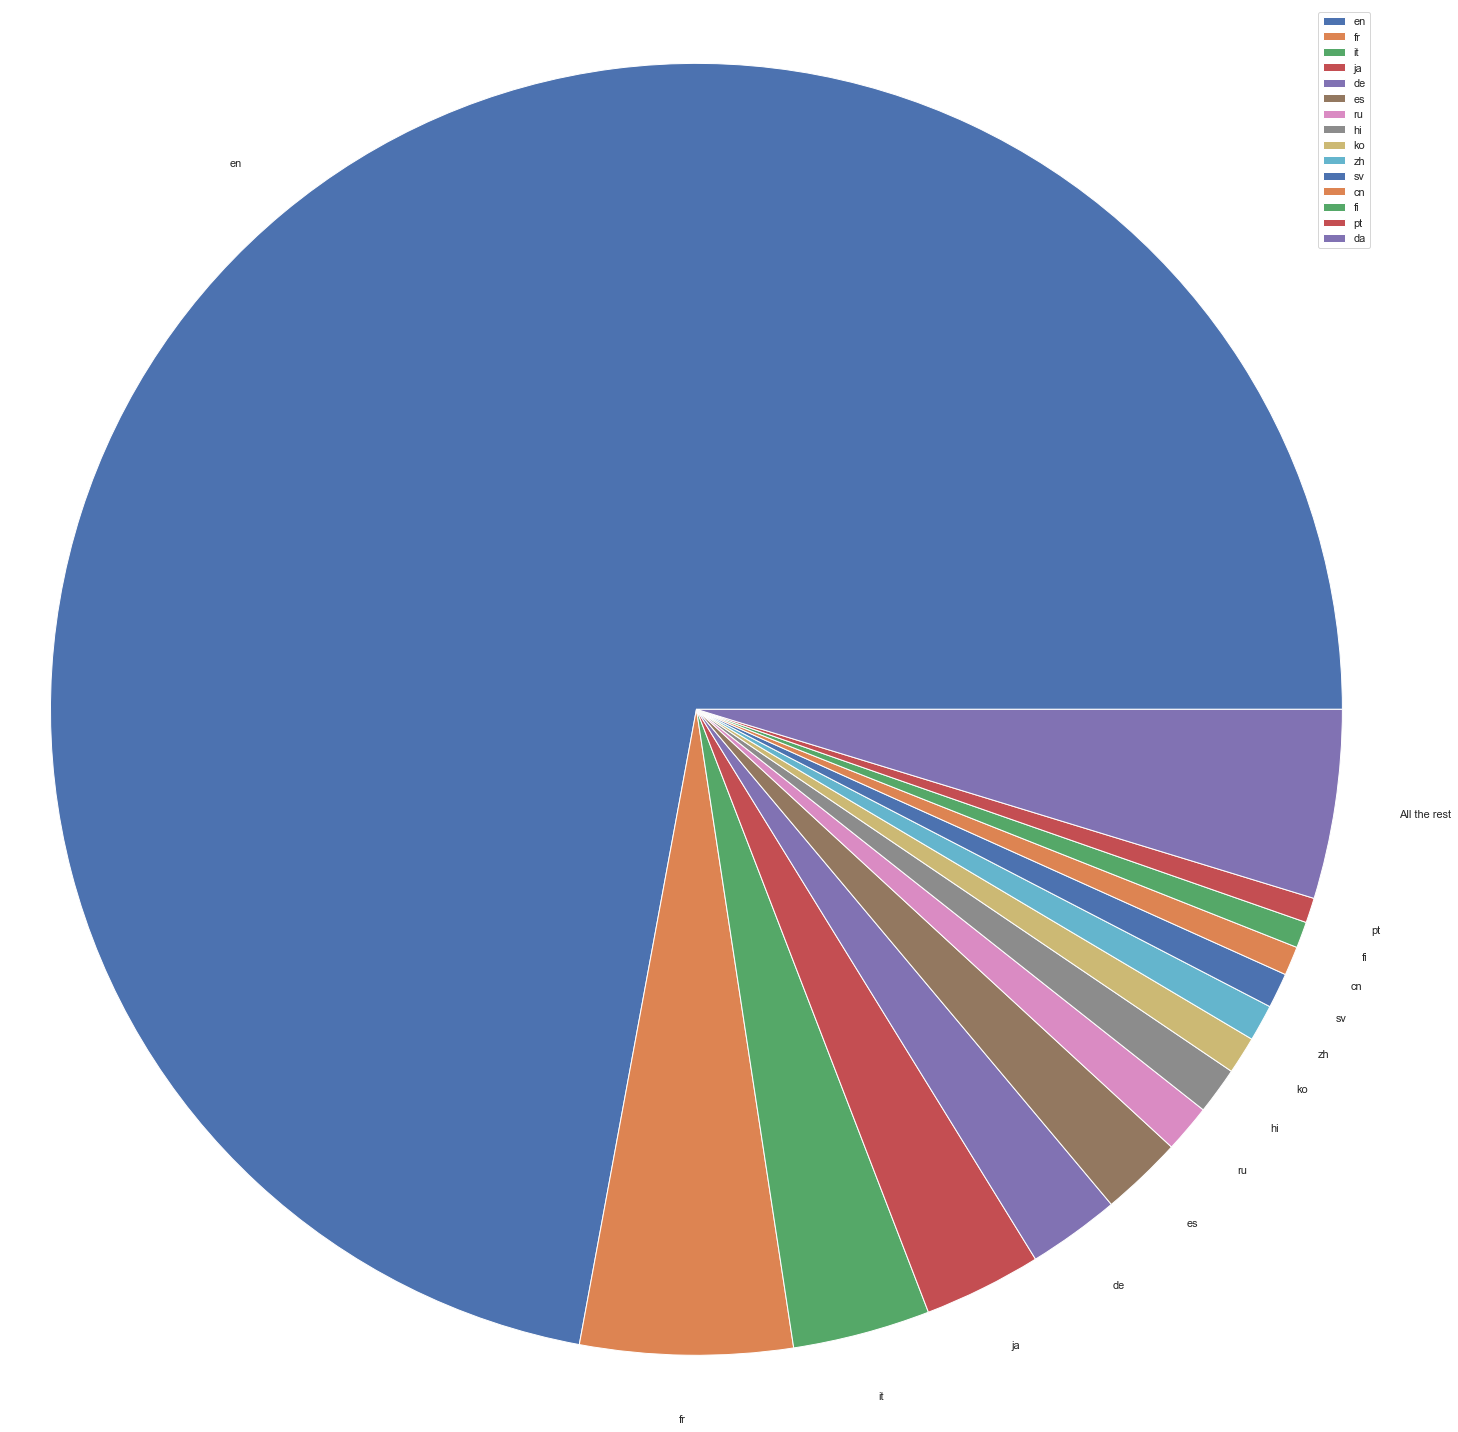

In [17]:
#Counts of Languages in Movies
dic={}
lab=all_data['original_language'].value_counts().index
Lang_count=np.array(all_data['original_language'].value_counts())
for i in range(len(lab)):
    dic[lab[i]]=Lang_count[i]


#remove other languages
# group together all elements in the dictionary whose value is less than 50
# name this group 'All the rest'
import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<200) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

patches,text=ax.pie(sizes, labels=labels, startangle=0)
plt.legend(patches, lab, loc="best")
ax.axis('equal')
plt.tight_layout()

plt.show()


In [18]:
all_data['original_language'].value_counts()

en    26824
fr     1975
it     1280
ja     1097
de      858
      ...  
zu        1
iu        1
ay        1
jv        1
ne        1
Name: original_language, Length: 87, dtype: int64

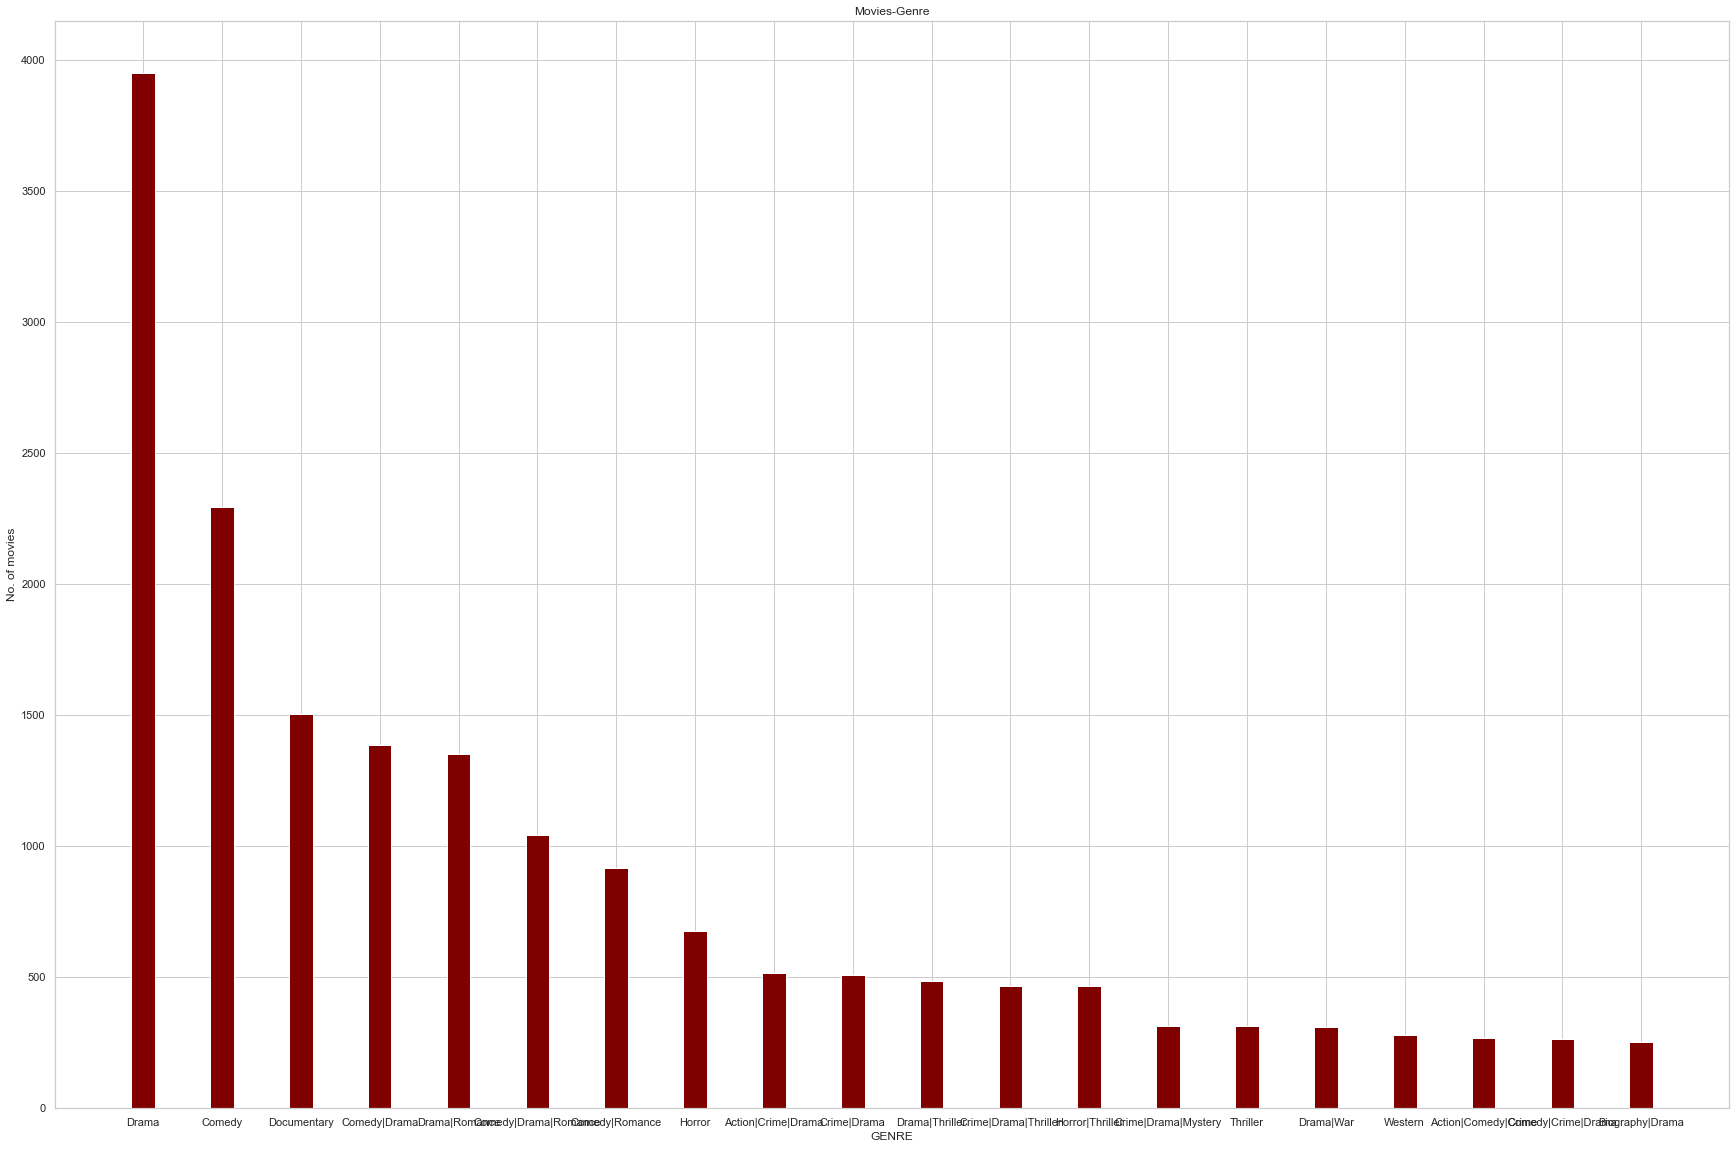

In [19]:
Genre_count=np.array(all_data['Genre'].value_counts())
GenreIndex=(all_data['Genre'].value_counts().index)
#print(len(GenreIndex)) #1283
fig = plt.figure(figsize = (30, 20))

plt.bar(GenreIndex[0:20],Genre_count[0:20], color ='maroon',
        width = 0.3)
 
plt.xlabel("GENRE")
plt.ylabel("No. of movies")
plt.title("Movies-Genre")
plt.show()
#remove other genre

In [36]:
all_data['Genre'].value_counts()

Drama                           3951
Comedy                          2294
Documentary                     1504
Comedy|Drama                    1388
Drama|Romance                   1353
                                ... 
Documentary|Biography|Horror       1
Documentary|Adventure|Crime        1
Thriller|Drama|Romance             1
Adventure|History|Western          1
Animation|Comedy|Mystery           1
Name: Genre, Length: 1282, dtype: int64

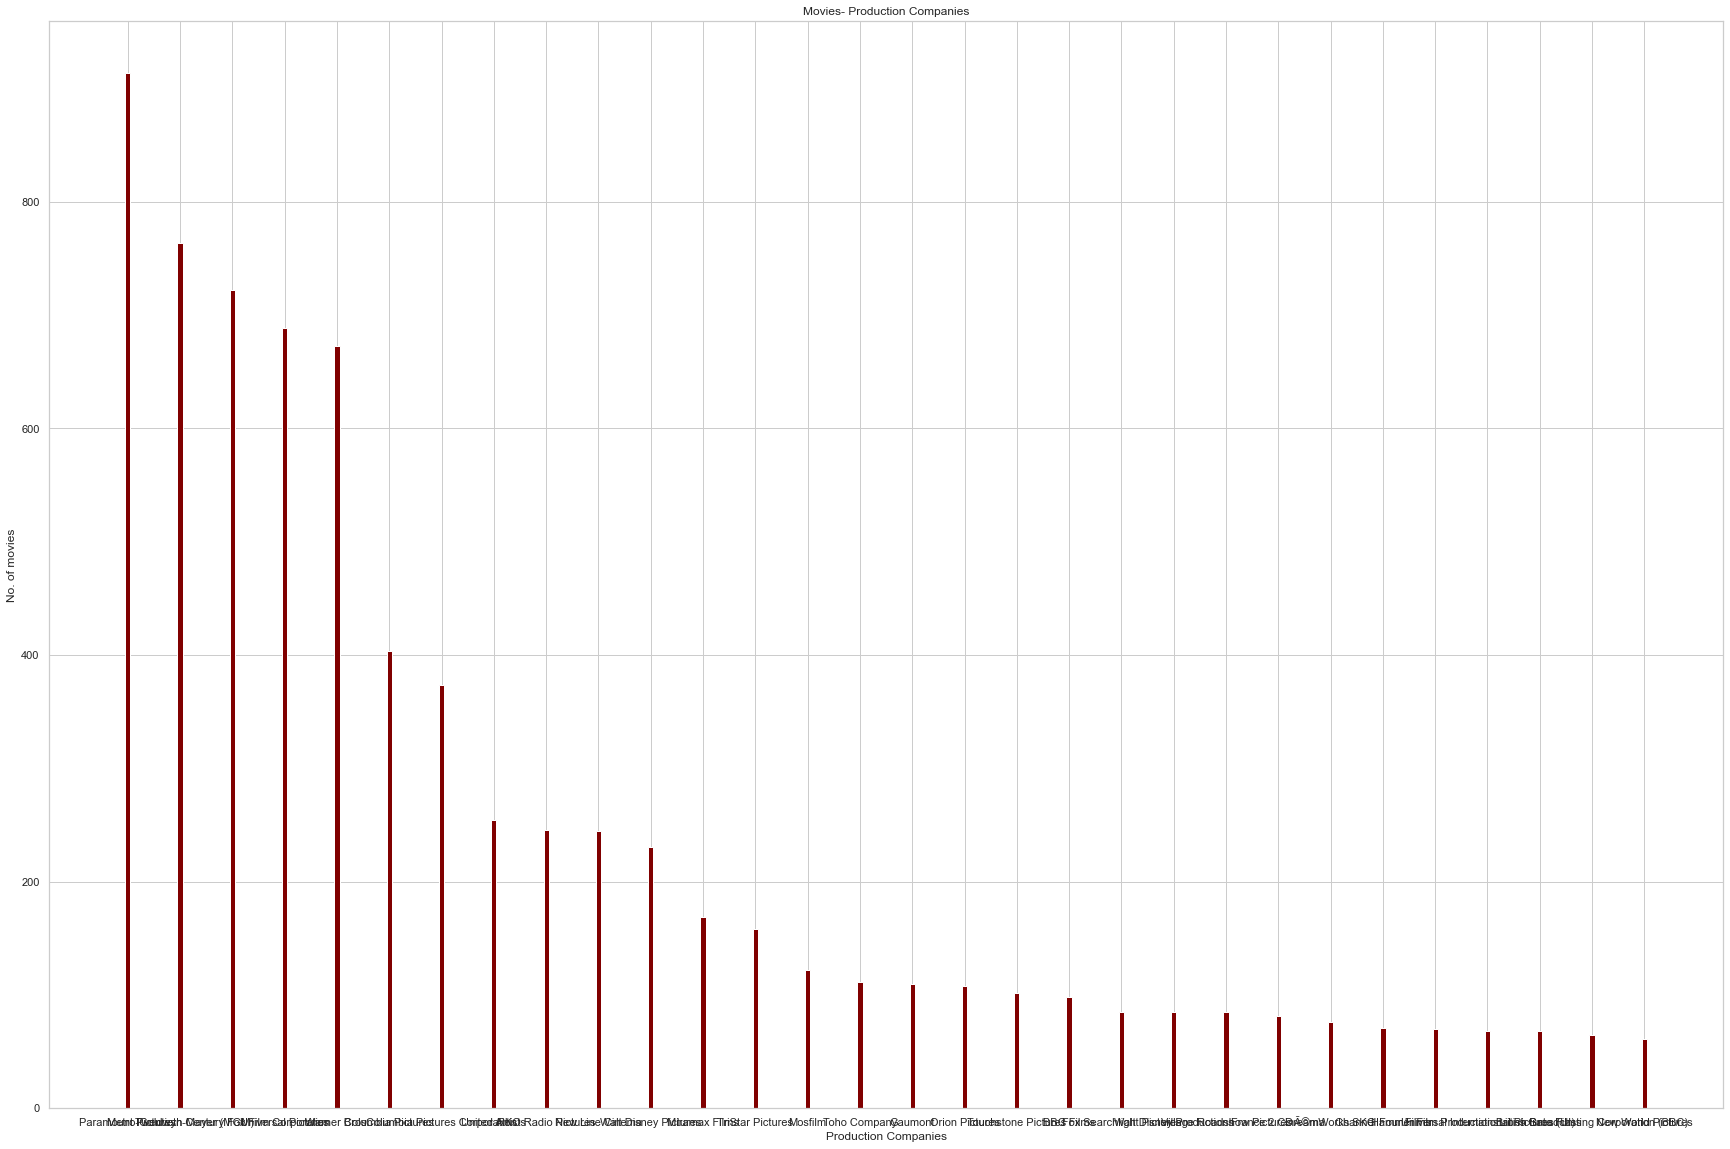

In [21]:

ProductionCompanies_count=np.array(all_data['production_companies'].value_counts())
production_companiesIndex=(all_data['production_companies'].value_counts().index)
#print(len(GenreIndex)) #1283
fig = plt.figure(figsize = (30, 20))

plt.bar(production_companiesIndex[0:30],ProductionCompanies_count[0:30], color ='maroon',
        width = 0.1)
 
plt.xlabel("Production Companies")
plt.ylabel("No. of movies")
plt.title("Movies- Production Companies")
plt.show()
#remove other production companies as there are many

In [22]:
all_data['production_companies'].value_counts()
#most production houses are unknown

Paramount Pictures                        914
Metro-Goldwyn-Mayer (MGM)                 764
Twentieth Century Fox Film Corporation    722
Universal Pictures                        689
Warner Bros.                              673
                                         ... 
VAE Productions                             1
Paulist Pictures                            1
National Picture Show Entertainment         1
Spirit Dance Entertainment                  1
Sub Pop Records                             1
Name: production_companies, Length: 8988, dtype: int64

In [23]:
all_data['production_countries'].value_counts().index[2]

"'GB'"

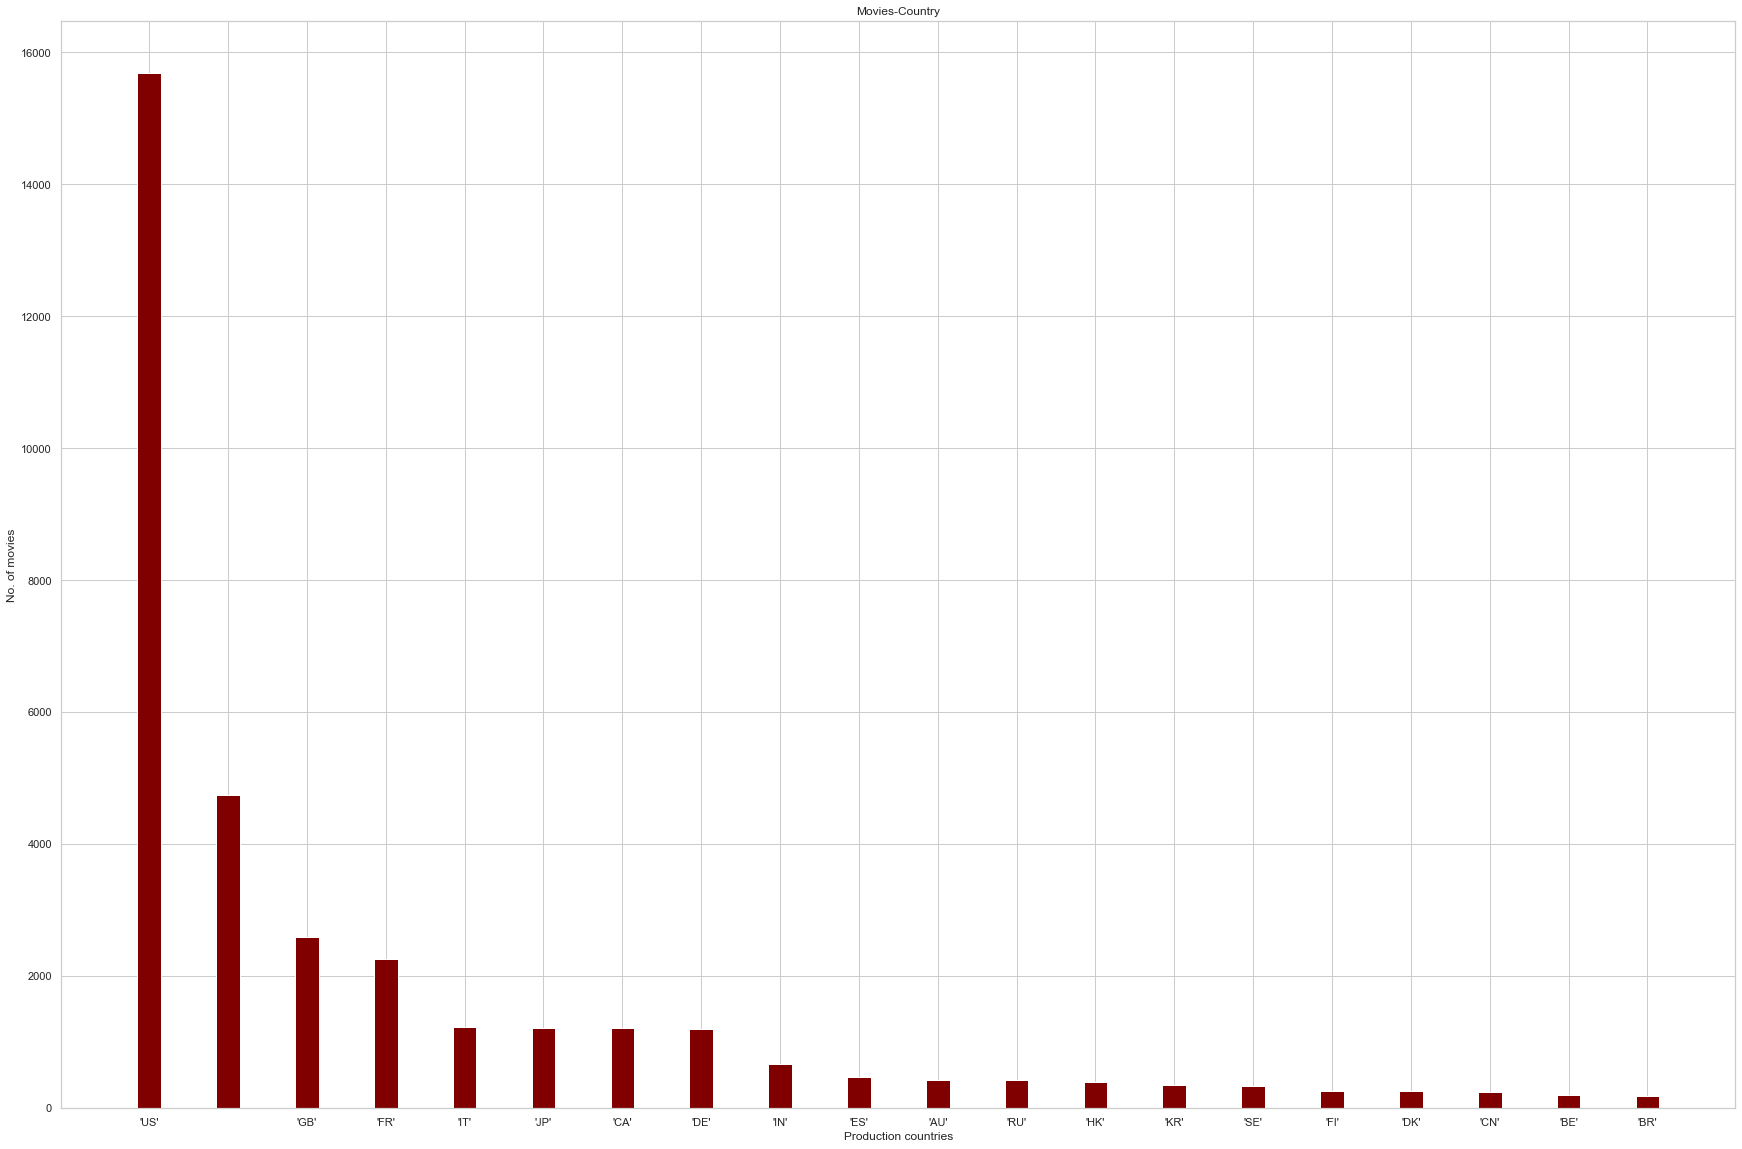

In [24]:
Production_Countries_count=np.array(all_data['production_countries'].value_counts())
Production_Countries_Names=(all_data['production_countries'].value_counts().index)

fig = plt.figure(figsize = (30, 20))

plt.bar(Production_Countries_Names[0:20],Production_Countries_count[0:20], color ='maroon',
        width = 0.3)
 
plt.xlabel("Production countries")
plt.ylabel("No. of movies")
plt.title("Movies-Country")
plt.show()
#many are unknown, also group others into one quantity

In [25]:
def get_words(message, tokenizer = None):
    if tokenizer:
        doc = tokenizer(message)
        return [i.text for i in doc]
    else:
        return message.lower().split('|')

def create_dictionary(messages, min_count = 5, tokenizer = None):
    words_count = {}
    for i in tqdm(range(len(messages))):
        s = messages[i]
        words = get_words(s, tokenizer)
        words_unique = list(dict.fromkeys(words))
        for w in words_unique:
            if w not in words_count:
                words_count[w] = 1
            else:
                words_count[w] += 1

    for word in list(words_count.keys()):
        if words_count[word] < min_count:
            del words_count[word]

    index = 1
    for word in list(words_count.keys()):
        words_count[word] = index
        index = index + 1

    return words_count

In [26]:
# min count is denoting the minimum number of times a word has to appear in the corpus to be included in the dictionary
genre_dictionary = create_dictionary( all_data['Genre'].astype(str).values, min_count=5)

100%|██████████| 37210/37210 [00:00<00:00, 318308.93it/s]


In [30]:
genre_dictionary  #list of genre occuring more than 5 times

{'animation': 1,
 'adventure': 2,
 'comedy': 3,
 'action': 4,
 'family': 5,
 'romance': 6,
 'drama': 7,
 'crime': 8,
 'thriller': 9,
 'fantasy': 10,
 'horror': 11,
 'biography': 12,
 'history': 13,
 'mystery': 14,
 'sci-fi': 15,
 'war': 16,
 'sport': 17,
 'music': 18,
 'documentary': 19,
 'musical': 20,
 'western': 21,
 'short': 22,
 'film-noir': 23,
 'nan': 24,
 'talk-show': 25,
 'news': 26,
 'adult': 27}

In [75]:

def get_count_genre(Col):
    genre_count_dict={}
    for Entry in Col:
        if isinstance(Entry,str):
            for key in genre_dictionary.keys():
                #print(key)
                #print(Entry)
                if key.lower() in Entry.lower():
                    #print("yes")
                    if key.lower() in genre_count_dict.keys():
                        genre_count_dict[key.lower()]=genre_count_dict[key.lower()]+1
                    else:
                         genre_count_dict[key.lower()]=1
    return genre_count_dict
            

In [76]:
genre_count_dict=get_count_genre(all_data['Genre'])

In [77]:
genre_count_dict

{'animation': 1615,
 'adventure': 3573,
 'comedy': 11852,
 'action': 4986,
 'family': 1988,
 'romance': 5749,
 'drama': 18615,
 'crime': 4933,
 'thriller': 4537,
 'fantasy': 1886,
 'horror': 3780,
 'biography': 1841,
 'history': 1304,
 'mystery': 2234,
 'sci-fi': 1883,
 'war': 1093,
 'sport': 651,
 'music': 1954,
 'documentary': 3443,
 'musical': 799,
 'western': 805,
 'short': 968,
 'film-noir': 383,
 'talk-show': 5,
 'news': 75,
 'adult': 13}

In [ ]:
all_data['cast'][0]

In [ ]:
pd.to_datetime(all_data.release_date)
all_data['year'] = pd.DatetimeIndex(all_data['release_date']).year
all_data = all_data.loc[all_data.year > 1980]
print(all_data.shape)

In [ ]:
score_by_genre = all_data.groupby(['Genre'])['IMDB Score'].agg(
    ['mean', 'count']).sort_values(by='mean')
score_by_genre[score_by_genre['count'] > 0]

In [ ]:
all_data.shape

In [ ]:
all_data.loc[1]

In [ ]:
(all_data.loc[1, 'cast'])

In [ ]:
from ast import literal_eval

In [ ]:
def get_director(l):
  for d in l:
    if d['job'] == 'Director':
      return d['name']
  return ''

def get_actors(l):
    if isinstance(l, list):
        actors = [d['name'] for d in l]
        if len(actors) >= 3:
            actors = actors[:3]
            return '|'.join(actors)
        return '|'.join(actors)


directors = all_data['crew'].apply(literal_eval).apply(get_director)
top_actors = all_data['cast'].apply(literal_eval).apply(get_actors)

In [ ]:
all_data['director'] = directors
all_data['actors'] = top_actors

In [ ]:
all_data.shape

In [ ]:
cols = ['posterID', 'IMDB Score', 'overview', 'Genre', 'director', 'actors', 'runtime',
        'num_faces', 'hue', 'hue_sd', 'saturation', 'saturation_sd ', 'brightness', 'brightness_sd', 'blue', 'blue_sd', 'green', 'green_sd', 'red', 'red_sd ']
new_cols = ['posterID', 'IMDBscore', 'overview', 'genre', 'director', 'actors', 'runtime',
            'num_faces', 'hue', 'hue_sd', 'saturation', 'saturation_sd', 'brightness', 'brightness_sd', 'blue', 'blue_sd', 'green', 'green_sd', 'red', 'red_sd']

In [ ]:
all_data = all_data[cols]
all_data = all_data.dropna()
print(all_data.shape)

In [ ]:
all_data.columns = new_cols
all_data = all_data.reset_index(drop=True)
print(all_data.shape)

In [ ]:
all_data.info()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_dataset, test_dataset = train_test_split(
    all_data, test_size=0.3, random_state=0)
valid_dataset, test_dataset = train_test_split(
    test_dataset, test_size=0.5, random_state=0)

train_data = train_dataset.reset_index(drop=True)
valid_data = valid_dataset.reset_index(drop=True)
test_data = test_dataset.reset_index(drop=True)

print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

train_data.to_csv('train.csv', index=False)
valid_data.to_csv('valid.csv', index=False)
test_data.to_csv('test.csv', index=False)

print('')
print(np.cov(train_data['IMDBscore']))
print(np.cov(valid_data['IMDBscore']))
print(np.cov(test_data['IMDBscore']))

In [ ]:
def get_words(message, tokenizer = None):
    if tokenizer:
        doc = tokenizer(message)
        return [i.text for i in doc]
    else:
        return message.lower().split('|')

def create_dictionary(messages, min_count = 5, tokenizer = None):
    words_count = {}
    for i in tqdm(range(len(messages))):
        s = messages[i]
        words = get_words(s, tokenizer)
        words_unique = list(dict.fromkeys(words))
        for w in words_unique:
            if w not in words_count:
                words_count[w] = 1
            else:
                words_count[w] += 1

    for word in list(words_count.keys()):
        if words_count[word] < min_count:
            del words_count[word]

    index = 1
    for word in list(words_count.keys()):
        words_count[word] = index
        index = index + 1

    return words_count


def transform_text(messages, word_dictionary, tokenizer = None):
    words_arr = np.zeros((len(messages), len(word_dictionary)))
    for i in range(words_arr.shape[0]):
        message_words = get_words(messages[i], tokenizer)
        message_indices = map(word_dictionary.get, message_words)
        for j in message_indices:
            if j is not None:
                words_arr[i, j-1] += 1
    return words_arr

In [ ]:
# min count is denoting the minimum number of times a word has to appear in the corpus to be included in the dictionary
genre_dictionary = create_dictionary(
    train_data['genre'].astype(str).values, min_count=5)

In [ ]:
print(genre_dictionary)

In [ ]:
train_genre_matrix = transform_text(
    train_data['genre'].astype(str).values, genre_dictionary)
valid_genre_matrix = transform_text(
    valid_data['genre'].astype(str).values, genre_dictionary)
test_genre_matrix = transform_text(
    test_data['genre'].astype(str).values, genre_dictionary)
# print(genre_dictionary)
print(train_genre_matrix.shape)
print(valid_genre_matrix.shape)
print(test_genre_matrix.shape)


In [ ]:
train_data['genre']

In [ ]:
director_dictionary = create_dictionary(
    train_data['director'].astype(str).values, min_count=5)
print('Size of dictionary: ', len(director_dictionary))
train_director_matrix = transform_text(
    train_data['director'].astype(str).values, director_dictionary)
valid_director_matrix = transform_text(
    valid_data['director'].astype(str).values, director_dictionary)
test_director_matrix = transform_text(
    test_data['director'].astype(str).values, director_dictionary)
# print(director_dictionary)
print(train_director_matrix.shape)
print(valid_director_matrix.shape)
print(test_director_matrix.shape)


In [ ]:
actors_dictionary = create_dictionary(
    train_data['actors'].astype(str).values, min_count=5)
print('Size of dictionary: ', len(actors_dictionary))
train_actors_matrix = transform_text(
    train_data['actors'].astype(str).values, actors_dictionary)
valid_actors_matrix = transform_text(
    valid_data['actors'].astype(str).values, actors_dictionary)
test_actors_matrix = transform_text(
    test_data['actors'].astype(str).values, actors_dictionary)
# print(actors_dictionary)
print(train_actors_matrix.shape)
print(valid_actors_matrix.shape)
print(test_actors_matrix.shape)


In [ ]:
import spacy

In [ ]:
train_overview_matrix.shape

In [ ]:
count = 0
for i in tqdm(range(valid_overview_matrix.shape[0])):
    for j in range(valid_overview_matrix.shape[1]):
        count += valid_overview_matrix[i,j]
count

In [ ]:
tokenizer = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner", "lemmatizer"])
overview_dictionary = create_dictionary(
    train_data['overview'], min_count=20, tokenizer=tokenizer)
print('Size of dictionary: ', len(overview_dictionary))
train_overview_matrix = transform_text(
    train_data['overview'].astype(str).values, overview_dictionary)
valid_overview_matrix = transform_text(
    valid_data['overview'].astype(str).values, overview_dictionary)
test_overview_matrix = transform_text(
    test_data['overview'].astype(str).values, overview_dictionary)
# print(overview_dictionary)
print(train_overview_matrix.shape)
print(valid_overview_matrix.shape)
print(test_overview_matrix.shape)


In [ ]:
for i in overview_dictionary:
    print(i, overview_dictionary[i])

# Encoding 

In [ ]:
train_data = pd.read_csv('train.csv')
valid_data = pd.read_csv('valid.csv')
test_data = pd.read_csv('test.csv')
train_data = train_data.drop(columns = ['overview','genre','director','actors'])
valid_data = valid_data.drop(columns = ['overview','genre','director','actors'])
test_data = test_data.drop(columns = ['overview','genre','director','actors'])
train_data = pd.concat([train_data, pd.DataFrame(train_genre_matrix, columns = genre_dictionary.keys()), pd.DataFrame(train_director_matrix, columns = director_dictionary.keys()), 
                        pd.DataFrame(train_actors_matrix, columns = actors_dictionary.keys()), pd.DataFrame(train_overview_matrix,  columns = overview_dictionary.keys())], axis=1)
valid_data = pd.concat([valid_data, pd.DataFrame(valid_genre_matrix, columns = genre_dictionary.keys()), pd.DataFrame(valid_director_matrix, columns = director_dictionary.keys()), 
                       pd.DataFrame(valid_actors_matrix, columns = actors_dictionary.keys() ), pd.DataFrame(valid_overview_matrix, columns = overview_dictionary.keys())], axis=1)
test_data = pd.concat([test_data, pd.DataFrame(test_genre_matrix, columns = genre_dictionary.keys()), pd.DataFrame(test_director_matrix, columns = director_dictionary.keys()), 
                       pd.DataFrame(test_actors_matrix, columns = actors_dictionary.keys() ), pd.DataFrame(test_overview_matrix, columns = overview_dictionary.keys())], axis=1)

In [ ]:
train_data.to_csv('train1.csv', index=False)
valid_data.to_csv('valid1.csv', index=False)
test_data.to_csv('test1.csv', index=False)


In [ ]:
train_data = pd.read_csv('train1.csv')
valid_data = pd.read_csv('valid1.csv')
test_data = pd.read_csv('test1.csv')


In [ ]:
train_data.shape

In [ ]:
train_data

## normailizing the data

In [ ]:
for col in ['runtime', 'num_faces', 'hue', 'hue_sd', 'saturation', 'saturation_sd', 'brightness', 'brightness_sd',
            'blue', 'blue_sd', 'green', 'green_sd', 'red', 'red_sd']:
    mean_feature = np.mean(train_data[col])
    sd_feature = np.std(train_data[col])
    if sd_feature != 0:
        train_data[col] = (train_data[col] - mean_feature) / sd_feature
        valid_data[col] = (valid_data[col] - mean_feature) / sd_feature
        test_data[col] = (test_data[col] - mean_feature) / sd_feature
    else:
        train_data[col] = (train_data[col] - mean_feature)
        valid_data[col] = (valid_data[col] - mean_feature)
        test_data[col] = (test_data[col] - mean_feature)


In [ ]:
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)
train_X = train_data.drop(columns=['posterID', 'IMDBscore'])
valid_X = valid_data.drop(columns=['posterID', 'IMDBscore'])
test_X = test_data.drop(columns=['posterID', 'IMDBscore'])

# Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
print(np.cov(train_data['IMDBscore']))
print(np.cov(valid_data['IMDBscore']))
print(np.cov(test_data['IMDBscore']))


In [ ]:
reg = LinearRegression().fit(train_X, train_data['IMDBscore'])

print('Train R^2: ', reg.score(train_X, train_data['IMDBscore']))
print('Train MSE: ', mean_squared_error(
    reg.predict(train_X), train_data['IMDBscore']))

print('Valid R^2: ', reg.score(valid_X, valid_data['IMDBscore']))
print('Valid MSE: ', mean_squared_error(
    reg.predict(valid_X), valid_data['IMDBscore']))

print('Test R^2: ', reg.score(test_X, test_data['IMDBscore']))
print('Test MSE: ', mean_squared_error(
    reg.predict(test_X), test_data['IMDBscore']))

In [ ]:
reg = Ridge(alpha=10, random_state=0).fit(train_X, train_data['IMDBscore'])

print('Train R^2: ', reg.score(train_X, train_data['IMDBscore']))
print('Train MSE: ', mean_squared_error(
    reg.predict(train_X), train_data['IMDBscore']))

print('Valid R^2: ', reg.score(valid_X, valid_data['IMDBscore']))
print('Valid MSE: ', mean_squared_error(
    reg.predict(valid_X), valid_data['IMDBscore']))

print('Test R^2: ', reg.score(test_X, test_data['IMDBscore']))
print('Test MSE: ', mean_squared_error(
    reg.predict(test_X), test_data['IMDBscore']))


In [ ]:
reg = Lasso(alpha=0.0001, random_state=0).fit(train_X, train_data['IMDBscore'])

print('Train R^2: ', reg.score(train_X, train_data['IMDBscore']))
print('Train MSE: ', mean_squared_error(
    reg.predict(train_X), train_data['IMDBscore']))

print('Valid R^2: ', reg.score(valid_X, valid_data['IMDBscore']))
print('Valid MSE: ', mean_squared_error(
    reg.predict(valid_X), valid_data['IMDBscore']))

print('Test R^2: ', reg.score(test_X, test_data['IMDBscore']))
print('Test MSE: ', mean_squared_error(
    reg.predict(test_X), test_data['IMDBscore']))

In [ ]:
for i in train_X.columns:
    print(i)

In [ ]:
overview_dictionary

In [ ]:
train_X['The'].value_counts()

In [ ]:
reg.feature_importances_

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

In [ ]:
best_features = SelectKBest(score_func=chi2, k=1000)

In [ ]:
fit = best_features.fit(train_X, train_data['IMDBscore'])

In [ ]:
dfscore = pd.DataFrame(fit.scores_)
dfcolums = pd.DataFrame(train_data.columns)